<a href="https://colab.research.google.com/github/IslamJenishbekov/Study-of-the-Forbes-billionaires-list./blob/main/forbes_data_analytic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, mannwhitneyu

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/all_billionaires_1997_2024.csv')

Mounted at /content/drive


<ipython-input-2-5c24b78a0a72>:3: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/all_billionaires_1997_2024.csv')


#Первоначальный просмотр данных

In [ ]:
df

,year,month,rank,net_worth,last_name,first_name,full_name,birth_date,age,gender,country_of_citizenship,country_of_residence,city_of_residence,business_category,business_industries,organization_name,position_in_organization,self_made,wealth_status
0,1997,7,NaN,2.0 B,Sophonpanich,Chatri,Chatri Sophonpanich & family,1934-02-28,73.0,Male,Thailand,Thailand,Bangkok,Finance and Investments,['Finance and Investments'],NaN,NaN,False,NaN
1,1997,7,NaN,1.8 B,Adulyadej,King Bhumibol,King Bhumibol Adulyadej,1927-12-05,69.0,Male,Thailand,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
2,1998,7,NaN,3.3 B,Safra,Edmond,Edmond Safra,1932-08-06,65.0,Male,Lebanon,Lebanon,NaN,NaN,NaN,NaN,NaN,True,NaN
3,1999,7,NaN,1.0 B,Hinduja,"Srichand, Gopichand,",Srichand & Gopichand Hinduja,1935-11-28,NaN,NaN,India,United Kingdom,London,NaN,NaN,NaN,NaN,False,NaN
4,1999,7,NaN,7.1 B,Schwarz,Dieter,Dieter Schwarz,1939-09-24,59.0,Male,Germany,Germany,Neckarsulm,Fashion & Retail,['Fashion & Retail'],NaN,NaN,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34506,2024,4,2692.0,1.0 B,Zhang,Hong,Zhang Hong,NaN,NaN,Female,China,China,Hangzhou,Energy,['Energy'],NaN,NaN,True,Decreased
34507,2024,4,2692.0,1.0 B,Zheng,Xiaodong,Zheng Xiaodong,1964-03-01,60.0,Male,China,China,Shanghai,Manufacturing,['Manufacturing'],NaN,NaN,True,Decreased
34508,2024,4,2692.0,1.0 B,Zhong,Sheng Jian,Zhong Sheng Jian,1958-03-03,66.0,Male,Singapore,Singapore,Singapore,Real Estate,['Real Estate'],NaN,NaN,True,Decreased
34509,2024,4,2692.0,1.0 B,Zhou,Junjie,Zhou Junjie,1968-07-20,55.0,Male,China,China,Hangzhou,Manufacturing,['Manufacturing'],NaN,NaN,True,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34511 entries, 0 to 34510
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      34511 non-null  int64  
 1   month                     34511 non-null  int64  
 2   rank                      34493 non-null  float64
 3   net_worth                 34511 non-null  object 
 4   last_name                 30822 non-null  object 
 5   first_name                30760 non-null  object 
 6   full_name                 34511 non-null  object 
 7   birth_date                30044 non-null  object 
 8   age                       33765 non-null  float64
 9   gender                    30682 non-null  object 
 10  country_of_citizenship    34502 non-null  object 
 11  country_of_residence      33792 non-null  object 
 12  city_of_residence         33514 non-null  object 
 13  business_category         28669 non-null  object 
 14  busine

#Чистка данных

Удаляем не особо нужные и неполные колонки

In [ ]:
df.drop(["last_name", "first_name", "organization_name", "position_in_organization", "self_made", "birth_date"], axis=1, inplace=True)

In [ ]:
df.groupby('year').agg({"full_name" : "count"})

,full_name
year,
1997,2
1998,1
1999,8
2000,8
2001,335
2002,333
2003,332
2004,432
2005,530


In [ ]:
df = df.loc[df.year > 2000]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34492 entries, 19 to 34510
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    34492 non-null  int64  
 1   month                   34492 non-null  int64  
 2   rank                    34492 non-null  float64
 3   net_worth               34492 non-null  object 
 4   full_name               34492 non-null  object 
 5   age                     33750 non-null  float64
 6   gender                  30665 non-null  object 
 7   country_of_citizenship  34483 non-null  object 
 8   country_of_residence    33777 non-null  object 
 9   city_of_residence       33500 non-null  object 
 10  business_category       28658 non-null  object 
 11  business_industries     33510 non-null  object 
 12  wealth_status           27095 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 3.7+ MB


#Задачи


1) Посмотреть на распределение возраста миллиардеров

2) Оценить долю представителей женского пола в этом списке

3) Понаблюдать за ростом состояний миллиардеров

4) В каких странах чаще всего рождаются миллиардеры, и часто ли наблюдается их миграция в другие страны. Посмотреть в каких городах живут миллиардеры

5) В каких сферах миллиардеры зарабатывают свои деньги, и наблюдается ли смена тренда за эти 27 лет


#TASK 1

In [ ]:
df_ = df.loc[df.age > 0]

<Axes: ylabel='Density'>

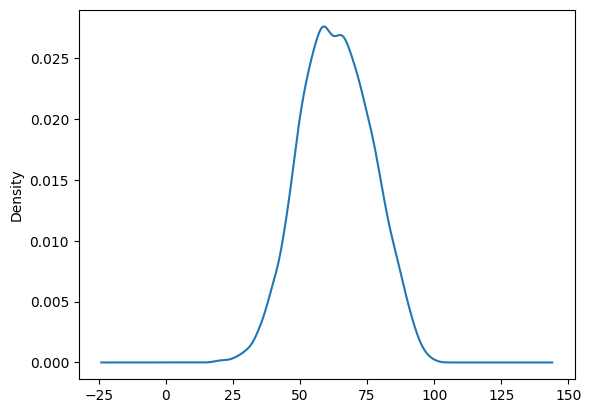

In [ ]:
df.loc[df.age > 0].age.plot(kind='kde')

<Axes: xlabel='age', ylabel='year'>

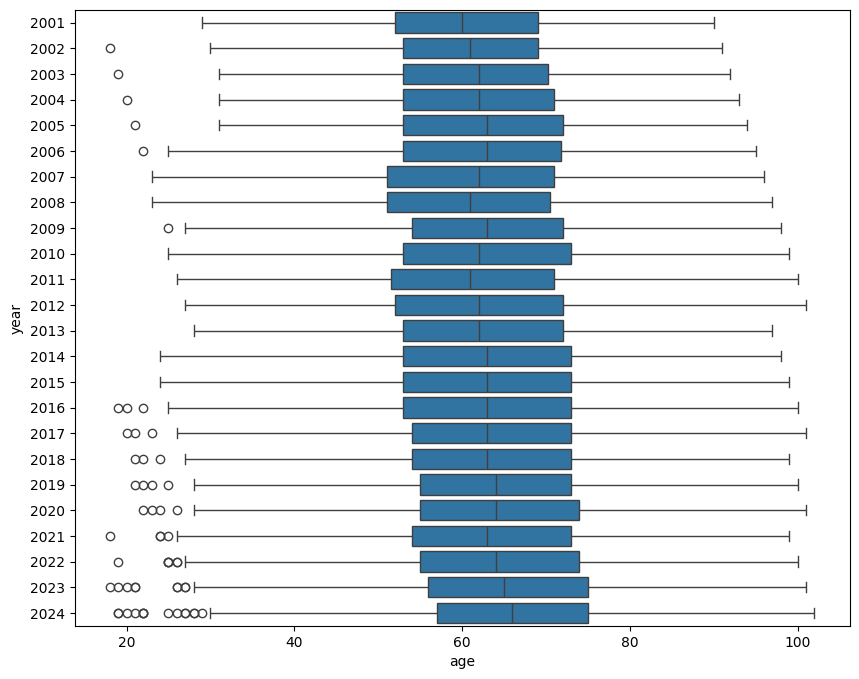

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(x=df_.age, y=df_.year.astype(str))

In [ ]:
df_.loc[df_.age < 20].drop_duplicates(subset=["full_name"], keep="first")

,year,month,rank,net_worth,full_name,age,gender,country_of_citizenship,country_of_residence,city_of_residence,business_category,business_industries,wealth_status
595,2002,3,327.0,1.4 B,Albert von Thurn und Taxis,18.0,NaN,Germany,Germany,Regensburg,NaN,NaN,NaN
14839,2016,3,1476.0,1.2 B,Alexandra Andresen,19.0,Female,Norway,Norway,Oslo,Diversified,['Diversified'],NaN
24608,2021,4,925.0,3.3 B,Kevin David Lehmann,18.0,Male,Germany,NaN,NaN,Fashion & Retail,['Fashion & Retail'],NaN
29913,2023,4,818.0,3.5 B,Clemente Del Vecchio,18.0,Male,Italy,Italy,Milan,Fashion & Retail,['Fashion & Retail'],NaN
30845,2023,4,1725.0,1.7 B,Kim Jung-youn,19.0,Female,South Korea,South Korea,NaN,Media & Entertainment,['Media & Entertainment'],NaN
34399,2024,4,2545.0,1.1 B,Livia Voigt,19.0,Female,Brazil,Brazil,Florianópolis,Manufacturing,['Manufacturing'],NaN


#TASK 2


<Axes: xlabel='year', ylabel='COUNT_BY_GENDER'>

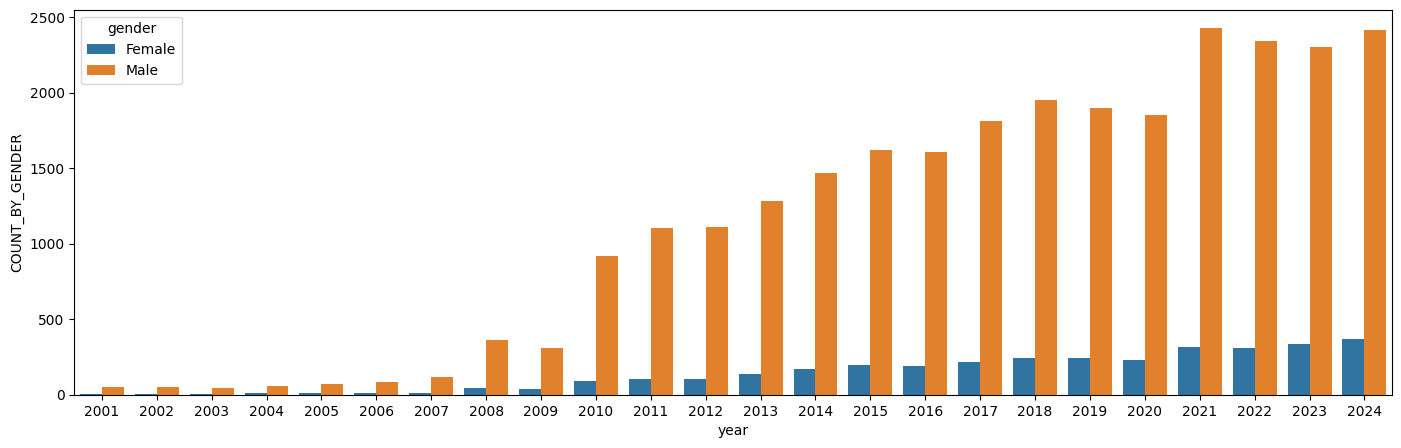

In [ ]:
df_ = df.groupby(["gender", "year"], as_index=False).agg(COUNT_BY_GENDER = ("full_name", "count"))
plt.figure(figsize=(17, 5))
sns.barplot(df_, x='year', y='COUNT_BY_GENDER', hue='gender')

In [ ]:
df_ = df_.pivot(index="year", columns="gender", values="COUNT_BY_GENDER")
df_["k"] = df_["Female"] / df_["Male"]

<Axes: xlabel='year', ylabel='k'>

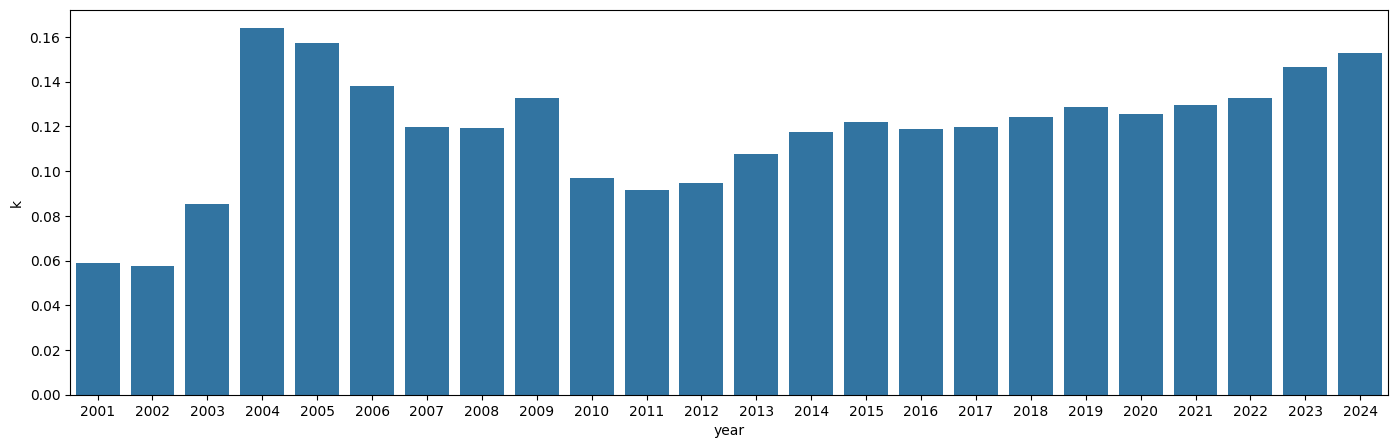

In [ ]:
plt.figure(figsize=(17, 5))
sns.barplot(x=df_.index, y=df_["k"])

#TASK 3


In [ ]:
df.net_worth = df.net_worth.map(lambda x: float(x.split()[0]))

<ipython-input-16-c06fa2b06fe8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.net_worth = df.net_worth.map(lambda x: float(x.split()[0]))


<Axes: xlabel='net_worth', ylabel='year'>

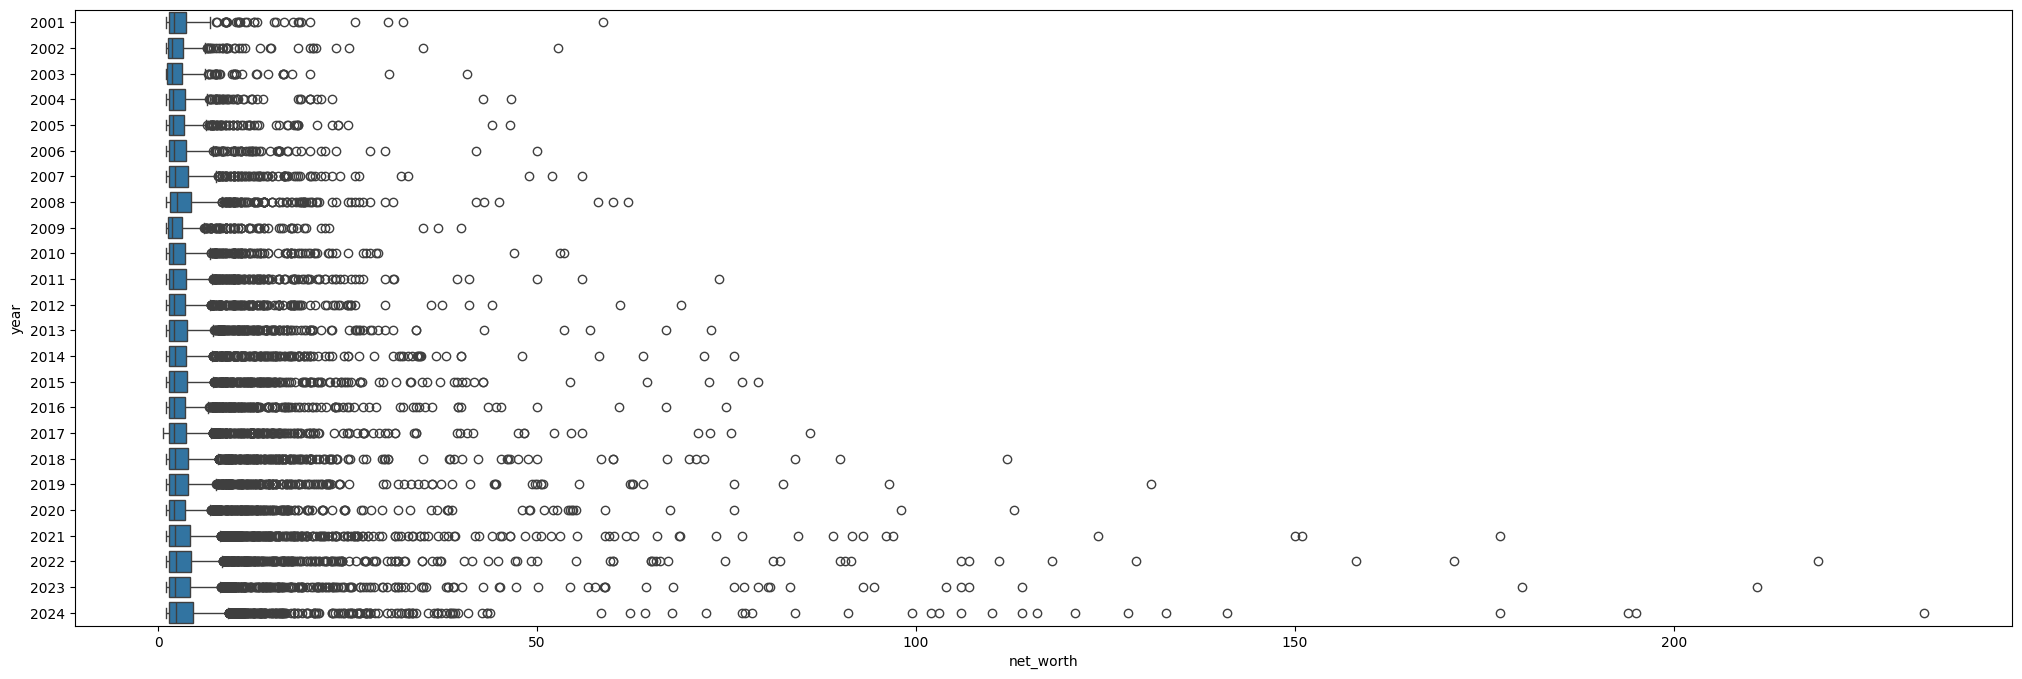

In [ ]:
plt.figure(figsize=(25, 8))
sns.boxplot(x=df.net_worth, y=df.year.astype(str))

In [ ]:
usd_to_rub = {
    2001: 29.17,
    2002: 31.35,
    2003: 30.69,
    2004: 28.81,
    2005: 28.78,
    2006: 27.19,
    2007: 25.58,
    2008: 24.85,
    2009: 31.84,
    2010: 30.48,
    2011: 29.35,
    2012: 31.07,
    2013: 31.85,
    2014: 38.42,
    2015: 61.53,
    2016: 67.14,
    2017: 58.35,
    2018: 62.72,
    2019: 64.73,
    2020: 74.00,
    2021: 73.67,
    2022: 73.38,
    2023: 82.08,
    2024: 88.79,  # август 2024 года
}

df["worth_rub"] = df.apply(lambda row: row["net_worth"] * 100 / (usd_to_rub[row["year"]]), axis=1)

<ipython-input-18-b32424dc6b90>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["worth_rub"] = df.apply(lambda row: row["net_worth"] * 100 / (usd_to_rub[row["year"]]), axis=1)


<Axes: xlabel='worth_rub', ylabel='year'>

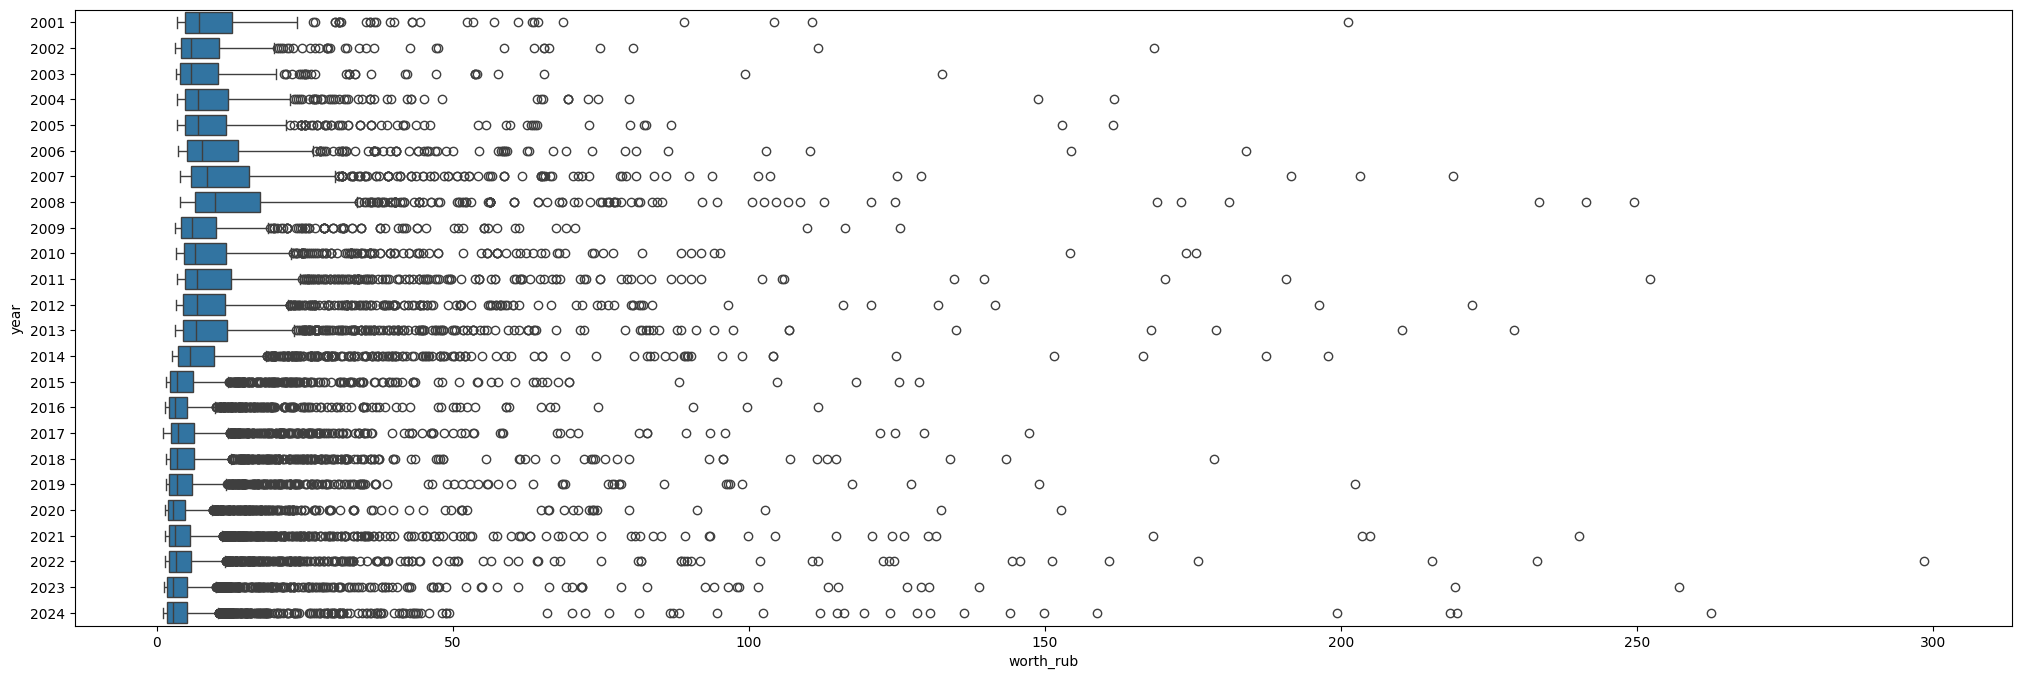

In [ ]:
plt.figure(figsize=(25, 8))
sns.boxplot(x=df.worth_rub, y=df.year.astype(str))

In [ ]:
df.loc[df.year == 2022].sort_values(ascending=False, by="worth_rub").head(1)

,year,month,rank,net_worth,full_name,age,gender,country_of_citizenship,country_of_residence,city_of_residence,business_category,business_industries,wealth_status,worth_rub
26422,2022,4,1.0,219.0,Elon Musk,50.0,Male,United States,United States,Austin,Automotive,['Automotive'],Increased,298.446443


# TASK 4


<ipython-input-21-4ea1e464173e>:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


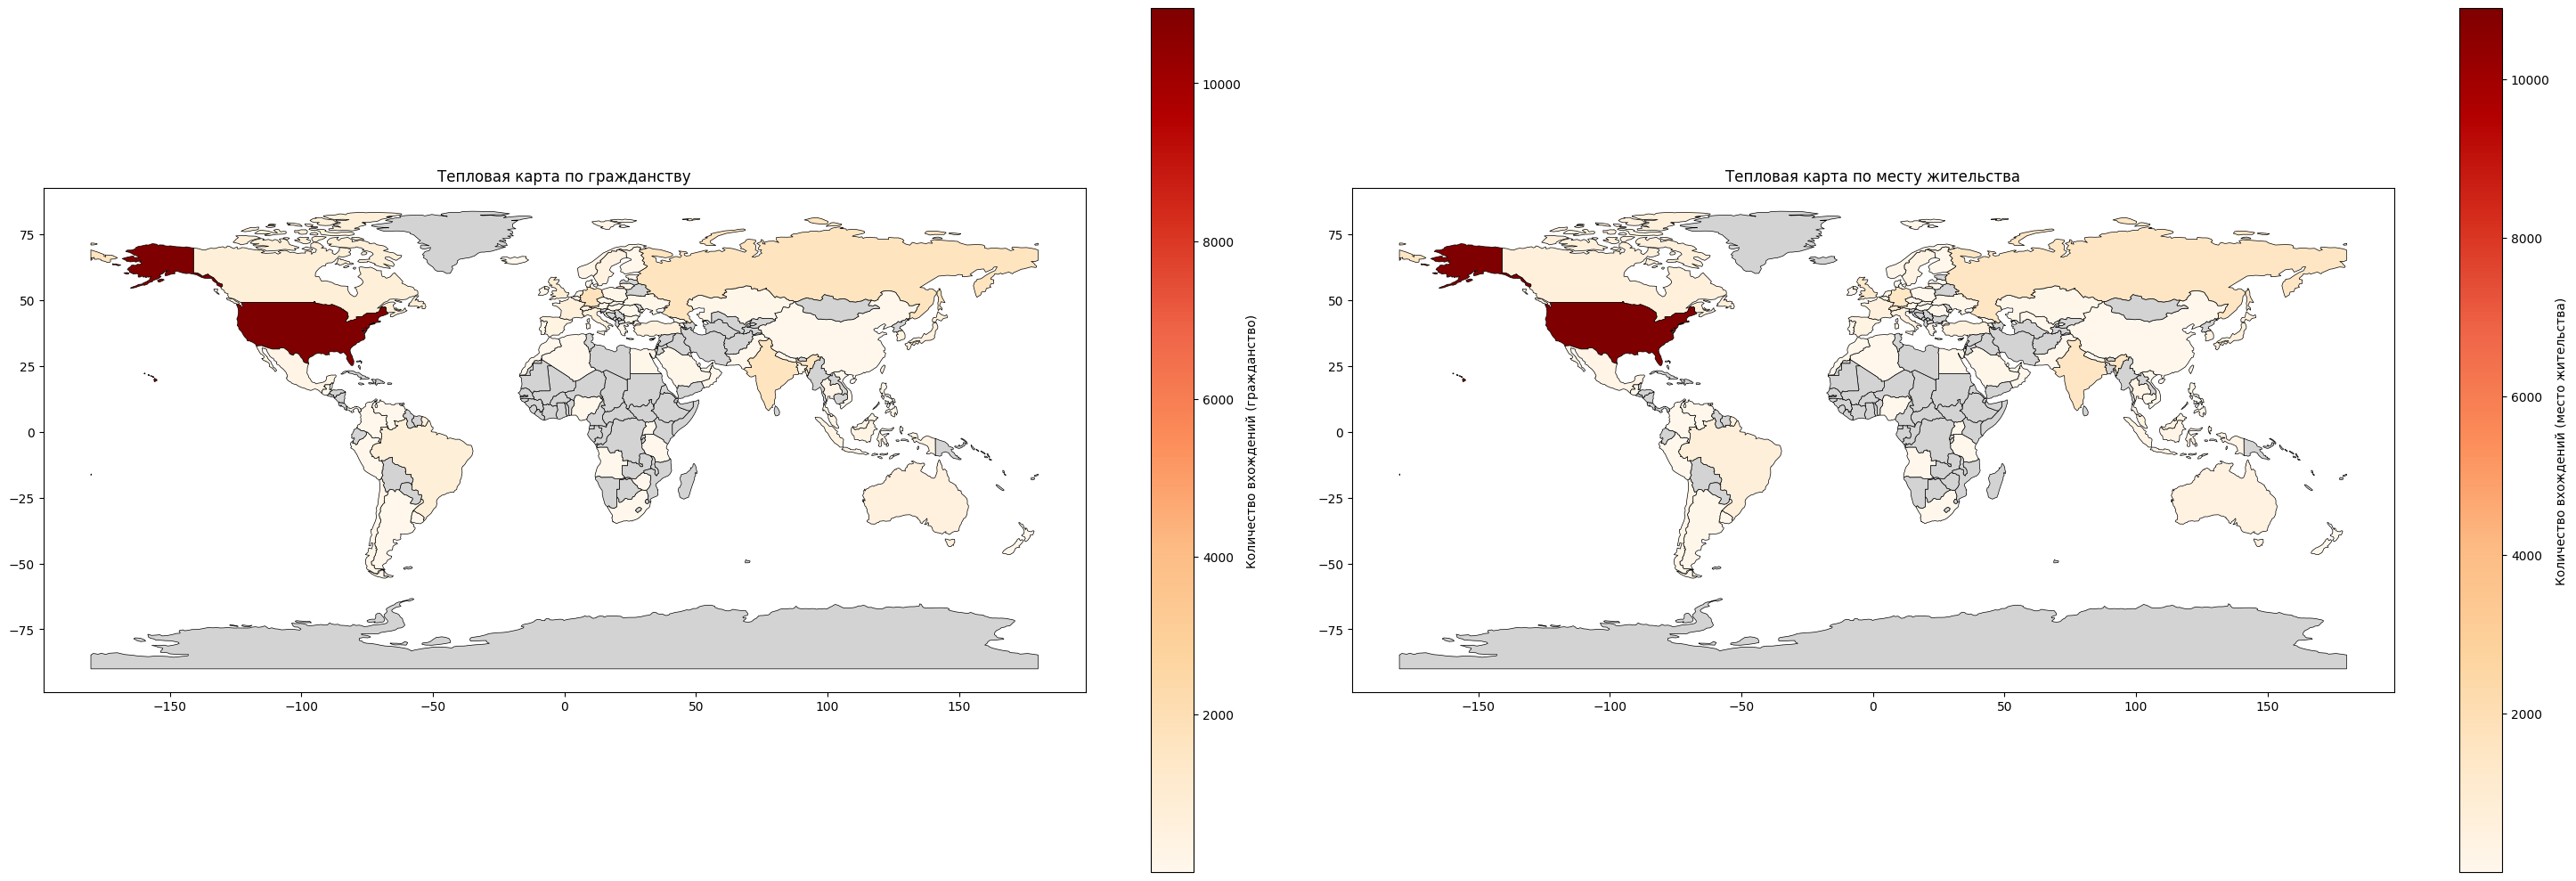

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

s_1 = df.groupby("country_of_citizenship").agg(COUNT_B=("full_name", "count"))
s_2 = df.groupby("country_of_residence").agg(COUNT_B=("full_name", "count"))

# Загрузка геоданных мира
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Ваш список стран с количеством вхождений по гражданству
country_counts_1 = s_1.rename(index={"United States" : "United States of America",
                                  "Czech Republic" : "Czechia",
                                  "Hong Kong" : "China",
                                  "Singapore" : "Malaysia",
                                  "Macau" : "China",
                                 "Macao" : "China",
                                 "Barbados" : "United States of America",
                                 "Eswatini (Swaziland)" : "South Africa",
                                 "Swaziland" : "South Africa",
                                 })["COUNT_B"].to_dict()

# Ваш список стран с количеством вхождений по месту жительства
country_counts_2 = s_2.rename(index={"United States" : "United States of America",
                                  "Czech Republic" : "Czechia",
                                  "Hong Kong" : "China",
                                  "Singapore" : "Malaysia",
                                  "Macau" : "China",
                                 "Macao" : "China",
                                 "Barbados" : "United States of America",
                                 "Eswatini (Swaziland)" : "South Africa",
                                 "Swaziland" : "South Africa",
                                 })["COUNT_B"].to_dict()

# Создание 2 подграфиков (2 карты) на одном рисунке
fig, axes = plt.subplots(1, 2, figsize=(30, 10))

# Первая карта по гражданству
world['count'] = world['name'].map(country_counts_1)
world.plot(column='count', cmap='OrRd', legend=True,
           legend_kwds={'label': "Количество вхождений (гражданство)"},
           edgecolor='black', linewidth=0.5,
           missing_kwds={'color': 'lightgrey'},
           ax=axes[0])  # передаем ось для первой карты
axes[0].set_title('Тепловая карта по гражданству')

# Вторая карта по месту жительства
world['count'] = world['name'].map(country_counts_2)
world.plot(column='count', cmap='OrRd', legend=True,
           legend_kwds={'label': "Количество вхождений (место жительства)"},
           edgecolor='black', linewidth=0.5,
           missing_kwds={'color': 'lightgrey'},
           ax=axes[1])  # передаем ось для второй карты
axes[1].set_title('Тепловая карта по месту жительства')

# Отображение обеих карт
plt.tight_layout()
plt.show()



In [ ]:
countries_leaved = {}
for key, value in country_counts_1.items():
  f = 0
  if key in country_counts_2.keys():
    f = value - country_counts_2[key]
  else:
    f = value
  if abs(f) > 20 and f/value > 0.2:
    countries_leaved[key] = f
countries_leaved

{'Canada': 168,
 'Colombia': 33,
 'Cyprus': 55,
 'Greece': 50,
 'Indonesia': 67,
 'Ireland': 51,
 'Israel': 83,
 'Lebanon': 55,
 'Netherlands': 34,
 'Norway': 39,
 'Sweden': 173}

In [ ]:
df.loc[df["country_of_citizenship"] != df["country_of_residence"]].groupby("country_of_residence").agg(COUNT_B=("full_name", "count")).sort_values(by="COUNT_B", ascending=False).head(10)

,COUNT_B
country_of_residence,
United Kingdom,613
Switzerland,556
China,364
United States,356
Hong Kong,266
Monaco,163
United Arab Emirates,132
Singapore,127
France,35


#TASK 5


In [ ]:
s.business_industries.unique()

array(["['Technology']", "['Finance']", "['Software']",
       "['Fashion & Retail']", "['Investments']", "['Retail']", nan,
       "['Pharmaceuticals']", "['Media']", "['Real Estate']", "['Food']",
       "['Manufacturing']", "['Apparel']", "['Diversified']",
       "['Insurance']", "['Beverages']", "['Oil']",
       "['Fashion and Retail']", "['Service']",
       "['Finance and Investments']",
       "['Construction &#38; Engineering']", "['Energy']",
       "['Logistics']", "['Sports']", "['Telecom']",
       "['Food and Beverage']", "['Health care']", "['Business']",
       "['Shipping']", "['Health Care']", "['Agriculture']",
       "['Construction & Engineering']", "['Metals & Mining']",
       "['Billionaire']", "['Technology                    ']",
       "['Automotive']", "['Fashion and Retail            ']",
       "['Chemicals']", "['Sports                        ']",
       "['Investments                   ']",
       "['Media                         ']", "['Media & Enterta

In [ ]:
s = df[["year", "net_worth", "business_industries"]]
s.business_industries = s.business_industries.astype(str)
s.business_industries = s.business_industries.map(lambda x: ''.join(x.replace("&", "and").replace("#38", '').replace(";", "").replace("['", "").replace("']", "").split()).lower())
s = s[~s.business_industries.isin(["nan", "billionaire", "diversified", "business"])]
print(s.business_industries.unique())

['technology' 'finance' 'software' 'fashionandretail' 'investments'
 'retail' 'pharmaceuticals' 'media' 'realestate' 'food' 'manufacturing'
 'apparel' 'insurance' 'beverages' 'oil' 'service' 'financeandinvestments'
 'constructionandengineering' 'energy' 'logistics' 'sports' 'telecom'
 'foodandbeverage' 'healthcare' 'shipping' 'agriculture' 'metalsandmining'
 'automotive' 'chemicals' 'mediaandentertainment' 'celebrity' 'gaming'
 'coal' 'internet' 'telecommunications' 'steel' 'luxurygoods' 'politics'
 'consumerproducts' 'biotechnology' 'hotelsandresorts' 'casinosandgaming'
 'leisure' 'banks' 'electronics' 'consumerservices'
 'informationtechnology' 'transportation' 'gamblingandcasinos' 'medicine']


<ipython-input-58-84c240473d2c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s.business_industries = s.business_industries.astype(str)
<ipython-input-58-84c240473d2c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s.business_industries = s.business_industries.map(lambda x: ''.join(x.replace("&", "and").replace("#38", '').replace(";", "").replace("['", "").replace("']", "").split()).lower())


In [ ]:
from IPython.display import display, clear_output
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from time import sleep

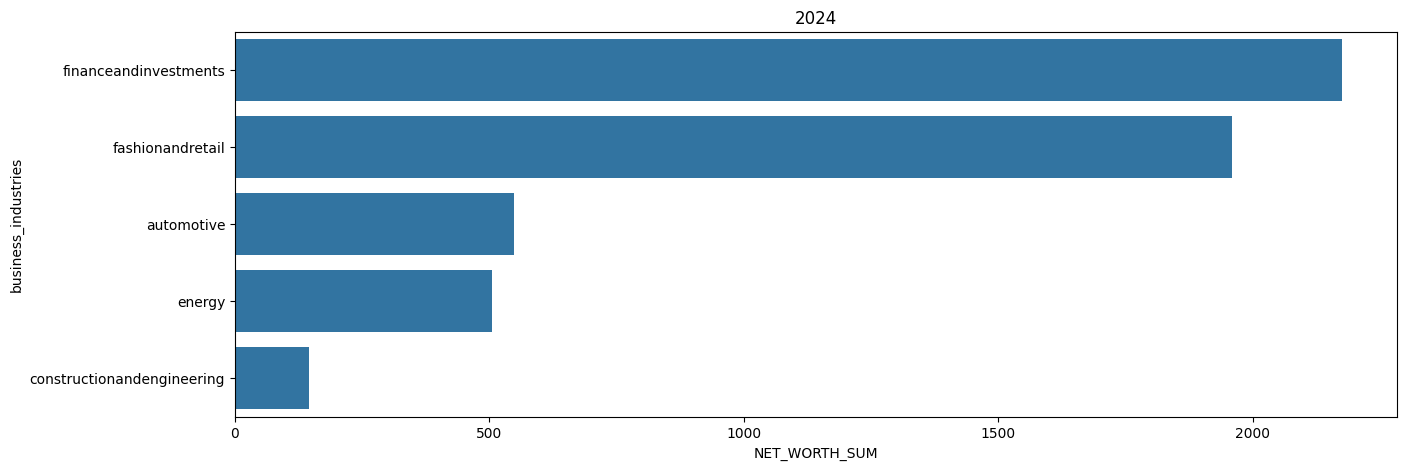

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
counter = 2000


def update(frame_number):
    global counter
    if counter > 2024:
      counter = 2024
    ax.cla()
    s_ = s.loc[s.year == counter]
    plt.title(str(counter))
    s_ = s_.groupby("business_industries", as_index=False).agg(NET_WORTH_SUM=("net_worth", "sum")).head(5).sort_values(by="NET_WORTH_SUM", ascending=False)

    counter += 1
    sns.barplot(s_, x="NET_WORTH_SUM", y="business_industries")

ani = FuncAnimation(fig, update, frames=24, interval = 3000, repeat=False)
video = HTML(ani.to_html5_video())
video

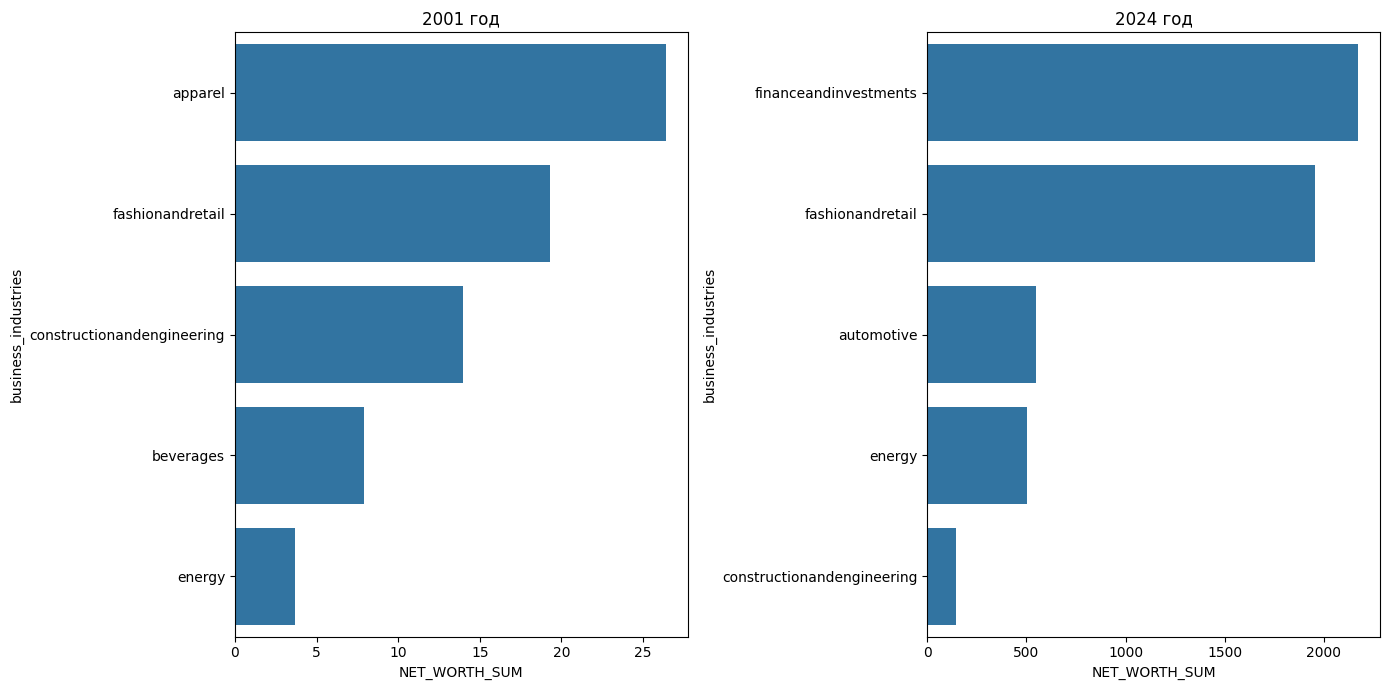

In [ ]:
s_2001 = s.loc[s.year == 2001]
s_2001 = s_2001.groupby("business_industries", as_index=False).agg(NET_WORTH_SUM=("net_worth", "sum")).head(5).sort_values(by="NET_WORTH_SUM", ascending=False)

s_2024 = s.loc[s.year == 2024]
s_2024 = s_2024.groupby("business_industries", as_index=False).agg(NET_WORTH_SUM=("net_worth", "sum")).head(5).sort_values(by="NET_WORTH_SUM", ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

sns.barplot(s_2001, x="NET_WORTH_SUM", y="business_industries", ax=axes[0])
axes[0].set_title("2001 год")

sns.barplot(s_2024, x="NET_WORTH_SUM", y="business_industries", ax=axes[1])
axes[1].set_title("2024 год")

plt.tight_layout()
plt.show()
